In [49]:
import pandas as pd
import numpy as np
import seaborn
import sklearn
import matplotlib.pyplot as plt

# **DATASET 1**

## Read Dataset

In [50]:
#READ CSV FROM GITHUB
dt1 = pd.read_csv('https://raw.githubusercontent.com/supasonicx/ATA-praktikum-01/main/Split-200000.csv')

In [51]:
#SHAPE OF DATASETS
dt1.shape

(200000, 8)

In [52]:
#HEAD OF DATASETS
dt1.head(10)

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,2009-06-15 17:26:21.0000001,4.5,2009-06-15 17:26:21 UTC,-73.844311,40.721319,-73.841610,40.712278,1
1,2010-01-05 16:52:16.0000002,16.9,2010-01-05 16:52:16 UTC,-74.016048,40.711303,-73.979268,40.782004,1
2,2011-08-18 00:35:00.00000049,5.7,2011-08-18 00:35:00 UTC,-73.982738,40.761270,-73.991242,40.750562,2
3,2012-04-21 04:30:42.0000001,7.7,2012-04-21 04:30:42 UTC,-73.987130,40.733143,-73.991567,40.758092,1
4,2010-03-09 07:51:00.000000135,5.3,2010-03-09 07:51:00 UTC,-73.968095,40.768008,-73.956655,40.783762,1
5,2011-01-06 09:50:45.0000002,12.1,2011-01-06 09:50:45 UTC,-74.000964,40.731630,-73.972892,40.758233,1
6,2012-11-20 20:35:00.0000001,7.5,2012-11-20 20:35:00 UTC,-73.980002,40.751662,-73.973802,40.764842,1
7,2012-01-04 17:22:00.00000081,16.5,2012-01-04 17:22:00 UTC,-73.951300,40.774138,-73.990095,40.751048,1
8,2012-12-03 13:10:00.000000125,9.0,2012-12-03 13:10:00 UTC,-74.006462,40.726713,-73.993078,40.731628,1
9,2009-09-02 01:11:00.00000083,8.9,2009-09-02 01:11:00 UTC,-73.980658,40.733873,-73.991540,40.758138,2


In [53]:
#statistika mean, average, dll
dt1.describe()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
count,200000.000000,200000.000000,200000.000000,199999.000000,199999.000000,200000.000000
mean,11.342877,-72.506121,39.922326,-72.518673,39.925579,1.682445
std,9.837855,11.608097,10.048947,10.724226,6.751120,1.306730
min,-44.900000,-736.550000,-3116.285383,-1251.195890,-1189.615440,0.000000
25%,6.000000,-73.992050,40.735007,-73.991295,40.734092,1.000000
50%,8.500000,-73.981743,40.752761,-73.980072,40.753225,1.000000
75%,12.500000,-73.967068,40.767127,-73.963508,40.768070,2.000000
max,500.000000,2140.601160,1703.092772,40.851027,404.616667,6.000000


In [54]:
#checking missing values
dt1.isnull().sum().sort_values(ascending=False)

dropoff_longitude    1
dropoff_latitude     1
key                  0
fare_amount          0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
passenger_count      0
dtype: int64

In [55]:
#delete null value from datasets
dt1 = dt1.drop(dt1[dt1.isnull().any(1)].index, axis=0)

In [56]:
#checking values of datasets after delete
dt1.shape

(199999, 8)

## Fare_Amount

In [57]:
#checking anomaly data from datasets
dt1['fare_amount'].describe()

count    199999.000000
mean         11.342871
std           9.837879
min         -44.900000
25%           6.000000
50%           8.500000
75%          12.500000
max         500.000000
Name: fare_amount, dtype: float64

In [58]:
#selection amount below 0 (-) from fare_amount
from collections import Counter
Counter(dt1['fare_amount']<0)

Counter({False: 199986, True: 13})

In [59]:
#deleting below zero (-) from fare_amount
dt1 = dt1.drop(dt1[dt1['fare_amount']<0].index, axis=0)
dt1.shape

(199986, 8)

In [60]:
#melihat hasil datasets yang telah di hilangkan
dt1['fare_amount'].describe()

count    199986.000000
mean         11.344032
std           9.836736
min           0.000000
25%           6.000000
50%           8.500000
75%          12.500000
max         500.000000
Name: fare_amount, dtype: float64

In [61]:
# tarif maksimal 500$
dt1['fare_amount'].sort_values(ascending=False)

101885    500.00
130460    281.05
142550    255.00
149769    240.00
168218    235.00
           ...  
27891       0.00
105051      0.00
10002       0.00
175352      0.00
47302       0.00
Name: fare_amount, Length: 199986, dtype: float64

## Passenger_Count

In [62]:
dt1['passenger_count'].describe()

count    199986.000000
mean          1.682423
std           1.306692
min           0.000000
25%           1.000000
50%           1.000000
75%           2.000000
max           6.000000
Name: passenger_count, dtype: float64

In [63]:
#Delete above 6 values
dt1[dt1['passenger_count']>6]

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count


In [85]:
#delete outlier
dt1 = dt1.drop(dt1[dt1['passenger_count']==208].index, axis=0)
dt1.shape

(199982, 8)

In [86]:
#showing datasets after cleansing
dt1['passenger_count'].describe()

count    199982.000000
mean          1.682436
std           1.306702
min           0.000000
25%           1.000000
50%           1.000000
75%           2.000000
max           6.000000
Name: passenger_count, dtype: float64

## Pick Up Latitude && Pick Up Longtitude

In [87]:
dt1['pickup_latitude'].describe()

count    199982.000000
mean         39.927924
std           6.057485
min         -74.007670
25%          40.735006
50%          40.752761
75%          40.767125
max          69.400000
Name: pickup_latitude, dtype: float64

In [88]:
#cleansing data (Latitude -90 to 90) (Longitude -180 to 180)
dt1[dt1['pickup_latitude']<-90]

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count


In [89]:
dt1[dt1['pickup_latitude']>90]

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count


### Deleting Latitude (-90 to 90)

In [90]:
dt1 = dt1.drop(dt1[dt1['pickup_latitude']<-90].index, axis=0)

In [91]:
dt1.shape

(199982, 8)

In [92]:
dt1 = dt1.drop(dt1[dt1['pickup_latitude']>90].index, axis=0)

In [93]:
dt1.shape

(199982, 8)

### DELETE LONGITUDE (-180 to 180)

In [141]:
dt1['pickup_longitude'].describe()

count    199980.000000
mean        -72.514107
std          10.394136
min         -78.083332
25%         -73.992050
50%         -73.981743
75%         -73.967071
max          40.811147
Name: pickup_longitude, dtype: float64

In [95]:
dt1[dt1['pickup_longitude']<-180]

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count


In [96]:
dt1[dt1['pickup_longitude']>180]

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count


In [97]:
dt1 = dt1.drop(dt1[dt1['pickup_longitude']<-180].index, axis=0)

### Delete dropoff latitude

In [98]:
dt1[dt1['dropoff_latitude']<-90]

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count


In [103]:
dt1[dt1['dropoff_latitude']>90]

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count


In [101]:
dt1 = dt1.drop(dt1[dt1['dropoff_latitude']>90].index, axis=0)

In [102]:
dt1.shape

(199980, 8)

In [104]:
#checking data types
dt1.dtypes

key                   object
fare_amount          float64
pickup_datetime       object
pickup_longitude     float64
pickup_latitude      float64
dropoff_longitude    float64
dropoff_latitude     float64
passenger_count        int64
dtype: object

In [107]:
dt1['key'] = pd.to_datetime(dt1['key'])
dt1['pickup_datetime'] = pd.to_datetime(dt1['pickup_datetime'])

In [108]:
dt1.dtypes

key                       datetime64[ns]
fare_amount                      float64
pickup_datetime      datetime64[ns, UTC]
pickup_longitude                 float64
pickup_latitude                  float64
dropoff_longitude                float64
dropoff_latitude                 float64
passenger_count                    int64
dtype: object

In [105]:
dt1.head()

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,2009-06-15 17:26:21.0000001,4.5,2009-06-15 17:26:21 UTC,-73.844311,40.721319,-73.841610,40.712278,1
1,2010-01-05 16:52:16.0000002,16.9,2010-01-05 16:52:16 UTC,-74.016048,40.711303,-73.979268,40.782004,1
2,2011-08-18 00:35:00.00000049,5.7,2011-08-18 00:35:00 UTC,-73.982738,40.761270,-73.991242,40.750562,2
3,2012-04-21 04:30:42.0000001,7.7,2012-04-21 04:30:42 UTC,-73.987130,40.733143,-73.991567,40.758092,1
4,2010-03-09 07:51:00.000000135,5.3,2010-03-09 07:51:00 UTC,-73.968095,40.768008,-73.956655,40.783762,1


# **DATASETS 2**

## IMPORT LIBRARY

In [146]:
from sklearn.preprocessing import OrdinalEncoder
import matplotlib.pyplot as plt
%matplotlib inline
from scipy.stats import ttest_ind, ttest_rel
from scipy import stats

## READ DATASETS

In [147]:
dt2 = pd.read_csv('https://gitlab.com/andreass.bayu/file-directory/-/raw/main/adult.csv', na_values='?')
print('Number of rows : ' + format(dt2.shape[0]) + 'Number of featurs : ' + format(dt2.shape[1]))

Number of rows : 48842Number of featurs : 15


In [149]:
dt2.head(10)

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,NaN,103497,Some-college,10,Never-married,NaN,Own-child,White,Female,0,0,30,United-States,<=50K
5,34,Private,198693,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K
6,29,NaN,227026,HS-grad,9,Never-married,NaN,Unmarried,Black,Male,0,0,40,United-States,<=50K
7,63,Self-emp-not-inc,104626,Prof-school,15,Married-civ-spouse,Prof-specialty,Husband,White,Male,3103,0,32,United-States,>50K
8,24,Private,369667,Some-college,10,Never-married,Other-service,Unmarried,White,Female,0,0,40,United-States,<=50K
9,55,Private,104996,7th-8th,4,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,10,United-States,<=50K


## Check NA Values

In [150]:
#list object dtype
c = (dt2.dtypes == 'object')
categoricalvar = list(c[c].index)
#list integer and float dtype
Integer = (dt2.dtypes == 'int64')
Float = (dt2.dtypes == 'float64')
numericvar = list(Integer[Integer].index) + list(Float[Float].index)
#knowing missing values before cleansing
miss_percent = (dt2.isnull().sum()).sum()/np.product(dt2.shape)*100
print('Missing Values Before Cleansing = ' + str(round(miss_percent, 5)) + ' %')



Missing Values Before Cleansing = 0.88244 %


In [151]:
#see all from datasets
list(dt2.columns)

['age',
 'workclass',
 'fnlwgt',
 'education',
 'educational-num',
 'marital-status',
 'occupation',
 'relationship',
 'race',
 'gender',
 'capital-gain',
 'capital-loss',
 'hours-per-week',
 'native-country',
 'income']

In [152]:
#know dtypes
dt2.dtypes

age                 int64
workclass          object
fnlwgt              int64
education          object
educational-num     int64
marital-status     object
occupation         object
relationship       object
race               object
gender             object
capital-gain        int64
capital-loss        int64
hours-per-week      int64
native-country     object
income             object
dtype: object

### Rename columns

In [153]:
dt2.education.unique()

array(['11th', 'HS-grad', 'Assoc-acdm', 'Some-college', '10th',
       'Prof-school', '7th-8th', 'Bachelors', 'Masters', 'Doctorate',
       '5th-6th', 'Assoc-voc', '9th', '12th', '1st-4th', 'Preschool'],
      dtype=object)

In [154]:
dt2ren = dt2.rename(columns={'marital-status' : 'maritalstatus'})

In [155]:
ren = {
    'capital-gain' : 'capitalGain',
    'educational-num' : 'educationalNum',
    'capital-loss' : 'capitalLoss',
    'hours-per-week' : 'hoursPerWeek',
    'native-country' : 'nativeCountry'
}
dt2ren.rename(columns=ren, inplace=True)

In [156]:
dt2ren.head()

,age,workclass,fnlwgt,education,educationalNum,maritalstatus,occupation,relationship,race,gender,capitalGain,capitalLoss,hoursPerWeek,nativeCountry,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,NaN,103497,Some-college,10,Never-married,NaN,Own-child,White,Female,0,0,30,United-States,<=50K


### Mapping datasets

In [157]:
dt2ren.maritalstatus.unique()

array(['Never-married', 'Married-civ-spouse', 'Widowed', 'Divorced',
       'Separated', 'Married-spouse-absent', 'Married-AF-spouse'],
      dtype=object)

In [158]:
marstat_map = {
    'Never-married':0, 'Married-civ-spouse':1, 'Widowed':2,
    'Divorced':3, 'Separated':4, 'Married-spouse-absent':5,
    'Married-AF-spouse':6
}
dt2ren['maritalstatus'] = dt2ren['maritalstatus'].map(marstat_map)
dt2ren.head(10)

,age,workclass,fnlwgt,education,educationalNum,maritalstatus,occupation,relationship,race,gender,capitalGain,capitalLoss,hoursPerWeek,nativeCountry,income
0,25,Private,226802,11th,7,0,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,1,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,1,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,1,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,NaN,103497,Some-college,10,0,NaN,Own-child,White,Female,0,0,30,United-States,<=50K
5,34,Private,198693,10th,6,0,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K
6,29,NaN,227026,HS-grad,9,0,NaN,Unmarried,Black,Male,0,0,40,United-States,<=50K
7,63,Self-emp-not-inc,104626,Prof-school,15,1,Prof-specialty,Husband,White,Male,3103,0,32,United-States,>50K
8,24,Private,369667,Some-college,10,0,Other-service,Unmarried,White,Female,0,0,40,United-States,<=50K
9,55,Private,104996,7th-8th,4,1,Craft-repair,Husband,White,Male,0,0,10,United-States,<=50K


In [159]:
#transform with function cat.codes
dt2ren['race'] = dt2ren['race'].astype('category')
dt2ren['race_encoded'] = dt2ren['race'].cat.codes
dt2ren.head(10)

,age,workclass,fnlwgt,education,educationalNum,maritalstatus,occupation,relationship,race,gender,capitalGain,capitalLoss,hoursPerWeek,nativeCountry,income,race_encoded
0,25,Private,226802,11th,7,0,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K,2
1,38,Private,89814,HS-grad,9,1,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K,4
2,28,Local-gov,336951,Assoc-acdm,12,1,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K,4
3,44,Private,160323,Some-college,10,1,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K,2
4,18,NaN,103497,Some-college,10,0,NaN,Own-child,White,Female,0,0,30,United-States,<=50K,4
5,34,Private,198693,10th,6,0,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K,4
6,29,NaN,227026,HS-grad,9,0,NaN,Unmarried,Black,Male,0,0,40,United-States,<=50K,2
7,63,Self-emp-not-inc,104626,Prof-school,15,1,Prof-specialty,Husband,White,Male,3103,0,32,United-States,>50K,4
8,24,Private,369667,Some-college,10,0,Other-service,Unmarried,White,Female,0,0,40,United-States,<=50K,4
9,55,Private,104996,7th-8th,4,1,Craft-repair,Husband,White,Male,0,0,10,United-States,<=50K,4


In [160]:
#transform with ordinal encoder function from sklearn
ordenc = OrdinalEncoder()
dt2ren['gender'] = ordenc.fit_transform(dt2[['gender']])
dt2ren[['gender', 'gender']].head(10)

,gender,gender
0,1.0,1.0
1,1.0,1.0
2,1.0,1.0
3,1.0,1.0
4,0.0,0.0
5,1.0,1.0
6,1.0,1.0
7,1.0,1.0
8,0.0,0.0
9,1.0,1.0


In [161]:
dt2ren.race.unique()

['Black', 'White', 'Asian-Pac-Islander', 'Other', 'Amer-Indian-Eskimo']
Categories (5, object): ['Amer-Indian-Eskimo', 'Asian-Pac-Islander', 'Black', 'Other', 'White']

In [162]:
#saving each race into datasets
r1 = dt2ren[dt2ren['race_encoded'] == 1]
r2 = dt2ren[dt2ren['race_encoded'] == 2]
r3 = dt2ren[dt2ren['race_encoded'] == 3]
r4 = dt2ren[dt2ren['race_encoded'] == 4]
r5 = dt2ren[dt2ren['race_encoded'] == 5]

In [163]:
r3.tail()

,age,workclass,fnlwgt,education,educationalNum,maritalstatus,occupation,relationship,race,gender,capitalGain,capitalLoss,hoursPerWeek,nativeCountry,income,race_encoded
48356,27,NaN,147638,Masters,14,0,NaN,Not-in-family,Other,0.0,0,0,40,Japan,<=50K,3
48513,30,Private,215441,Some-college,10,0,Adm-clerical,Not-in-family,Other,1.0,0,0,40,NaN,<=50K,3
48544,27,Private,176761,HS-grad,9,0,Craft-repair,Other-relative,Other,1.0,0,0,40,Nicaragua,<=50K,3
48713,36,Private,208068,Preschool,1,3,Other-service,Not-in-family,Other,1.0,0,0,72,Mexico,<=50K,3
48825,31,Private,199655,Masters,14,3,Other-service,Not-in-family,Other,0.0,0,0,30,United-States,<=50K,3


## PLOTTING

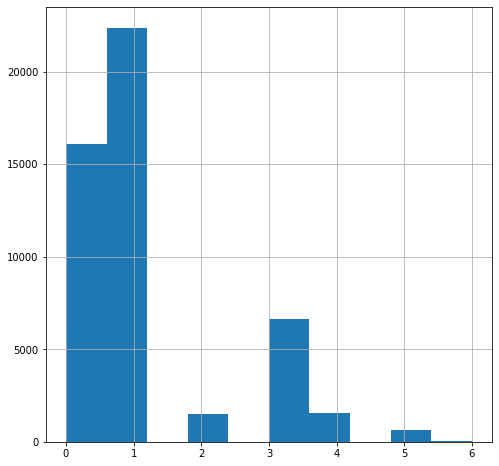

In [164]:
dt2ren['maritalstatus'].hist(figsize=(8,8))
plt.show()

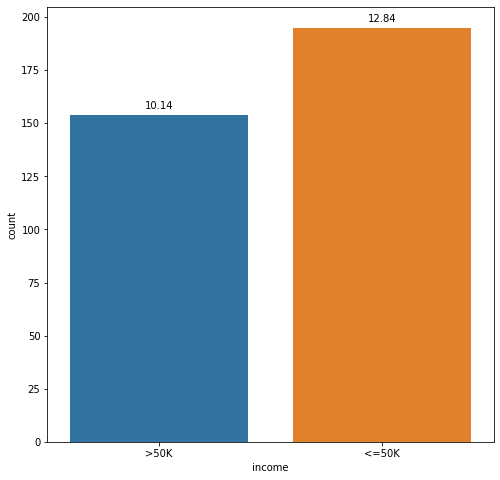

In [175]:
import seaborn as sns
plt.figure(figsize=(8,8))
tot = float(len(r1))

ax = sns.countplot(x='income', data=r1[r1['hoursPerWeek']>40])
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width()/2.,
    height + 3,
    '{:1.2f}'.format((height/tot)*100),
    ha='center')
plt.show()

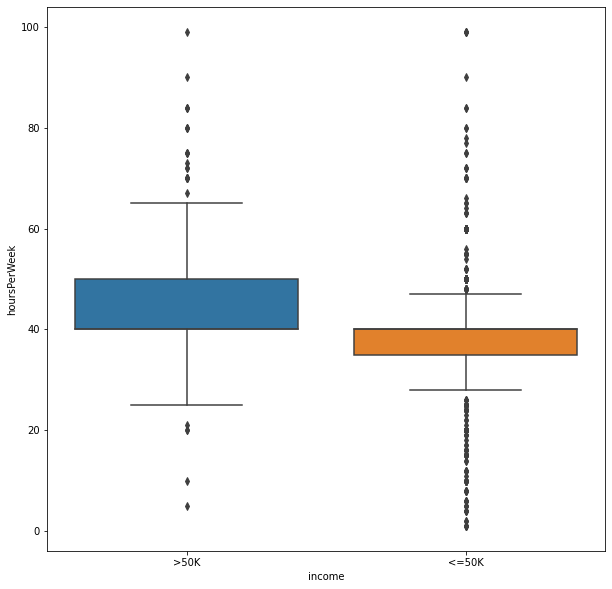

In [176]:
fig = plt.figure(figsize=(10,10))
sns.boxplot(x='income', y='hoursPerWeek', data=r1)
plt.show()

## Tugas
### 1. Cleansing data from NaN Values from datasets2
### 2. Do Histogram analysis from income and race
### 3. Rename columns Hours-Per-Week into hoursperweek
### 4. How many respondent who work above 40 hour per week for each race?

### Race 1

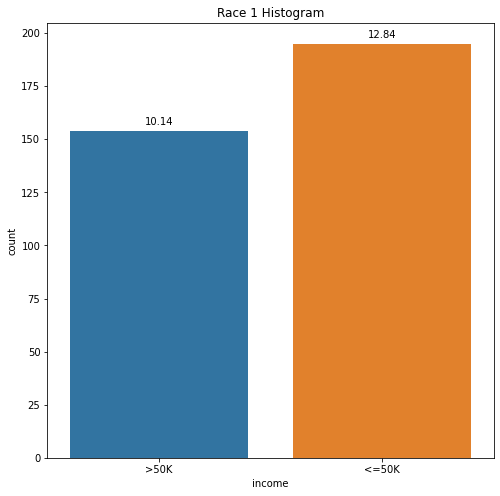

In [185]:
import seaborn as sns
plt.figure(figsize=(8,8))
tot = float(len(r1))

ax = sns.countplot(x='income', data=r1[r1['hoursPerWeek']>40])
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width()/2.,
    height + 3,
    '{:1.2f}'.format((height/tot)*100),
    ha='center')
plt.title('Race 1 Histogram')
plt.show()

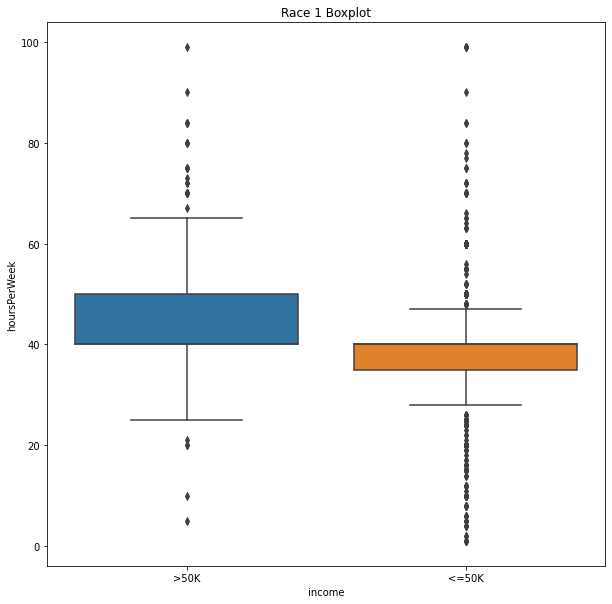

In [184]:
fig = plt.figure(figsize=(10,10))
sns.boxplot(x='income', y='hoursPerWeek', data=r1)
plt.title('Race 1 Boxplot')
plt.show()

### Race 2

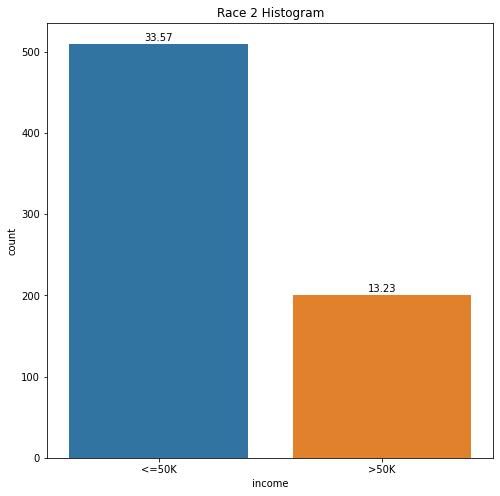

In [186]:
import seaborn as sns
plt.figure(figsize=(8,8))
tot = float(len(r1))

ax = sns.countplot(x='income', data=r2[r2['hoursPerWeek']>40])
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width()/2.,
    height + 3,
    '{:1.2f}'.format((height/tot)*100),
    ha='center')
plt.title('Race 2 Histogram')
plt.show()

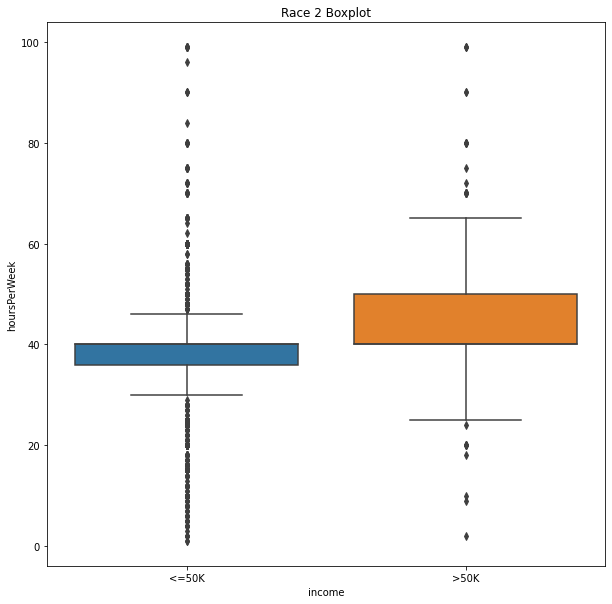

In [187]:
fig = plt.figure(figsize=(10,10))
sns.boxplot(x='income', y='hoursPerWeek', data=r2)
plt.title('Race 2 Boxplot')
plt.show()

### Race 3

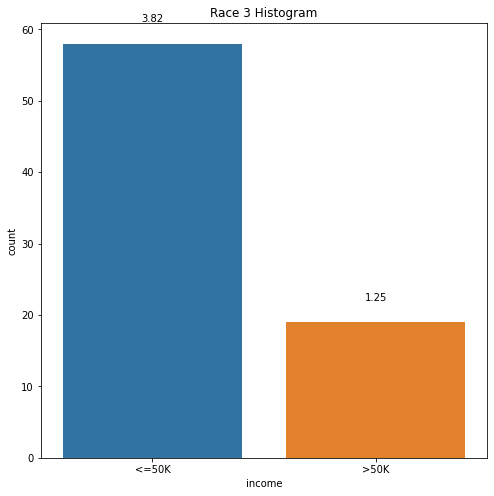

In [188]:
import seaborn as sns
plt.figure(figsize=(8,8))
tot = float(len(r1))

ax = sns.countplot(x='income', data=r3[r3['hoursPerWeek']>40])
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width()/2.,
    height + 3,
    '{:1.2f}'.format((height/tot)*100),
    ha='center')
plt.title('Race 3 Histogram')
plt.show()

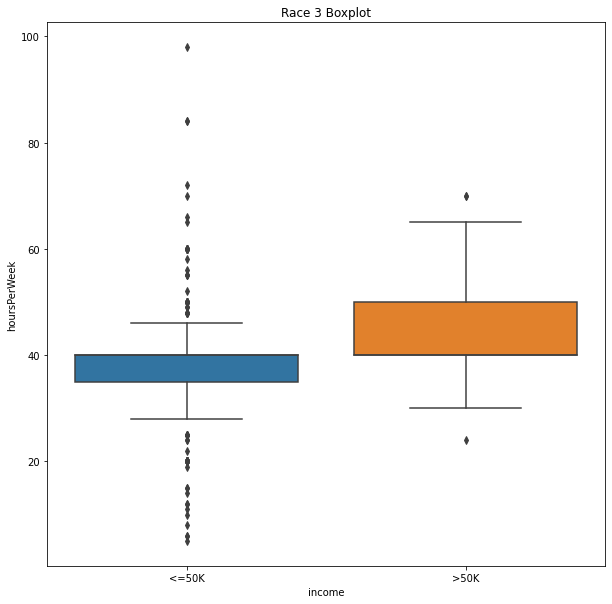

In [189]:
fig = plt.figure(figsize=(10,10))
sns.boxplot(x='income', y='hoursPerWeek', data=r3)
plt.title('Race 3 Boxplot')
plt.show()

### Race 4

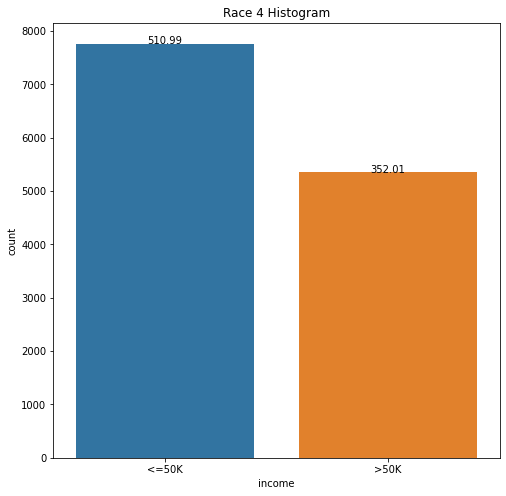

In [191]:
import seaborn as sns
plt.figure(figsize=(8,8))
tot = float(len(r1))

ax = sns.countplot(x='income', data=r4[r4['hoursPerWeek']>40])
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width()/2.,
    height + 3,
    '{:1.2f}'.format((height/tot)*100),
    ha='center')
plt.title('Race 4 Histogram')
plt.show()

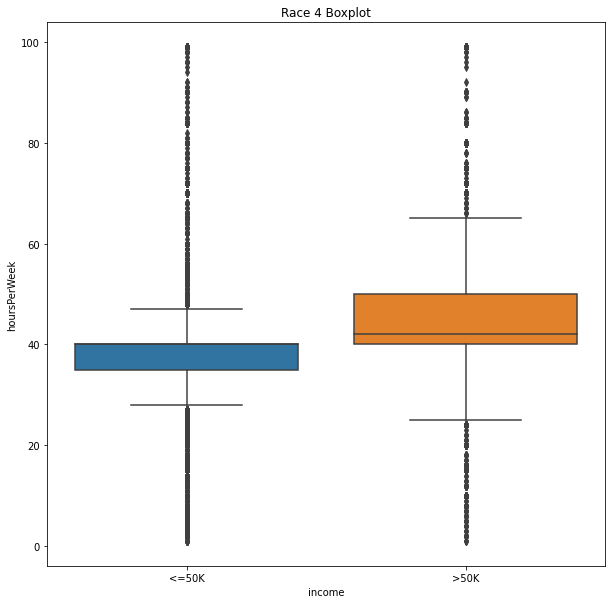

In [192]:
fig = plt.figure(figsize=(10,10))
sns.boxplot(x='income', y='hoursPerWeek', data=r4)
plt.title('Race 4 Boxplot')
plt.show()

### Race 5

In [194]:
import seaborn as sns
plt.figure(figsize=(8,8))
tot = float(len(r1))

ax = sns.countplot(x='income', data=r5[r5['hoursPerWeek']>40])
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width()/2.,
    height + 3,
    '{:1.2f}'.format((height/tot)*100),
    ha='center')
plt.title('Race 5 Histogram')
plt.show()

ValueError: min() arg is an empty sequence

<Figure size 576x576 with 0 Axes>